In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/일일 데이터 분석

Mounted at /content/drive
/content/drive/MyDrive/일일 데이터 분석


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

import warnings
warnings.filterwarnings('ignore')

raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

light_palette = np.array(raw_light_palette)/255
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

def pie_plot(frequency,labels,palette,title=None):
  labels_frequency = zip(labels,frequency,palette) 
  labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)

  sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
  sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
  sorted_colors = [x[2] for x in labels_frequency] ## 정렬된 색상
  
  # 0값이 있는 경우 제거
  while 0 in sorted_frequency:
    idx = sorted_frequency.index(0)
    sorted_frequency.pop(idx)
    sorted_labels.pop(idx)
  
  fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
  ax = fig.add_subplot() ## 프레임 생성
    
  ## 파이차트 출력
  pie = ax.pie(sorted_frequency,
               startangle=90, 
               counterclock=False, 
               colors = sorted_colors, 
               wedgeprops=wedgeprops
              )
  
  total = np.sum(frequency) ## 빈도수 합
  
  threshold = 5
  sum_pct = 0 ## 퍼센티지
  count_less_5pct = 0 ## 5%보다 작은 라벨의 개수
  spacing = 0.1 # 텍스트 사이의 간격

  for i,l in enumerate(sorted_labels):
      ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
      center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표, 반지름
      
      ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
      if sorted_frequency[i]/total*100 < threshold:
          x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
          y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
          count_less_5pct += 1
      else:
          x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
          y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
      
      ## 퍼센티지 출력
      if i < len(labels) - 1:
          sum_pct += float(f'{sorted_frequency[i]/total*100:.2f}')
          ax.text(x,y,f'{sorted_frequency[i]/total*100:.2f}%',ha='center',va='center',fontsize=15)
      else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
          ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=15)
  
  plt.legend(pie[0],sorted_labels,fontsize=14) ## 범례
  if title:
    plt.title(title,size=20)
  plt.show()

In [3]:
data = pd.read_csv('./법무부 유학생관리정보 데이터.csv',encoding='cp949')

In [4]:
data.head()

,성별,국적명,체류자격,학교명
0,여,베트남,전문학사과정,대구공업대학교
1,여,네팔,학사과정,경동대학교
2,여,중국,학사과정,고려대학교
3,여,일본,대학부설 어학원 연수,한양대학교
4,여,베트남,학사과정,선문대학교


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194359 entries, 0 to 194358
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   성별      194359 non-null  object
 1   국적명     194359 non-null  object
 2   체류자격    194359 non-null  object
 3   학교명     184870 non-null  object
dtypes: object(4)
memory usage: 5.9+ MB


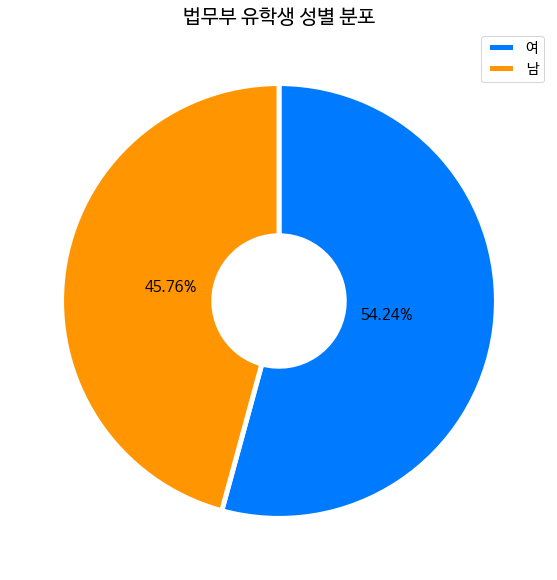

In [27]:
pie_plot(data['성별'].value_counts(),
         data['성별'].value_counts().index,
         light_palette,
         '법무부 유학생 성별 분포')

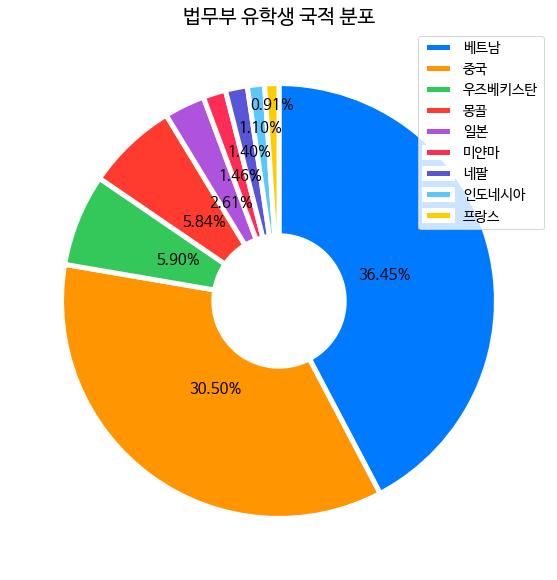

In [26]:
pie_plot(data['국적명'].value_counts(),
         data['국적명'].value_counts().index,
         light_palette,
         '법무부 유학생 국적 분포')

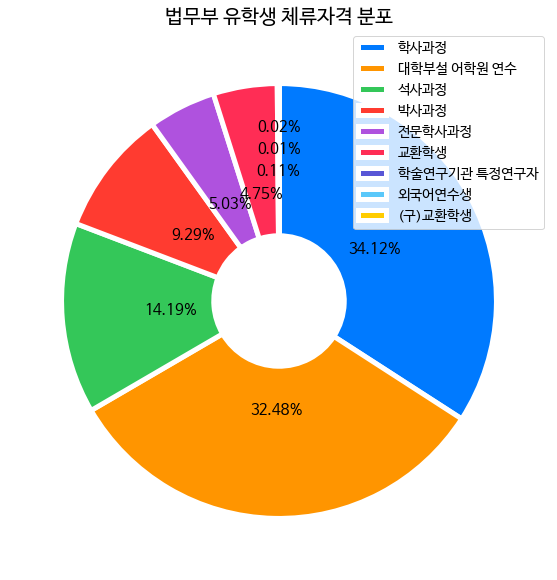

In [25]:
pie_plot(data['체류자격'].value_counts(),
         data['체류자격'].value_counts().index,
         light_palette,
         '법무부 유학생 체류자격 분포')

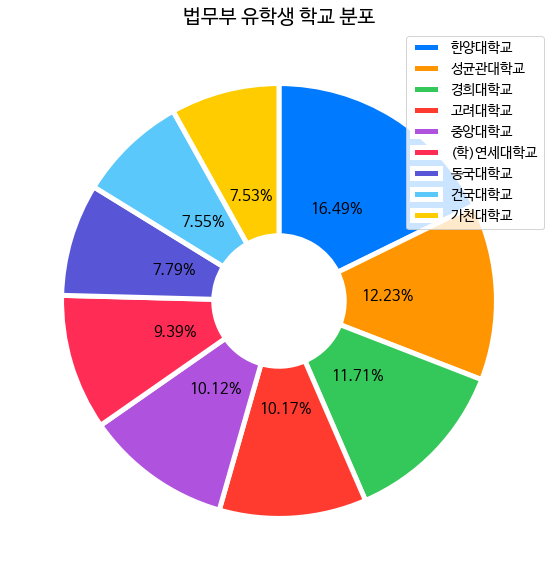

In [24]:
pie_plot(data['학교명'].value_counts()[:10],
         data['학교명'].value_counts()[:10].index,
         light_palette,
         '법무부 유학생 학교 분포')